# レスラー方程式(ランダムなシフト付きsin外力のある状態)

レスラー方程式の外力のある場合に関して，$\sin$ 波に位相のランダムなシフトがある場合を考える．

In [1]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import pandas as pd

dir_name = f"data"
os.makedirs(dir_name, exist_ok=True)


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# プロットを保存するディレクトリ
dir_name_plot = 'plots'
if not os.path.exists(dir_name_plot):
    os.makedirs(dir_name_plot)

# shift_hourの範囲でループ
for shift_hour in range(-12, 13):
    filename_with_force = f"{dir_name}/VDP_{shift_hour}.csv"

    # CSVファイルを読み込む
    # 実際のCSVファイルが存在する場合にのみ動作します
    data_loaded_with_force = pd.read_csv(filename_with_force)

    # CSVから値を抽出してNumpy配列に格納
    sample = 0
    plot_length = 5000

    # 時間ごとのx, y, P_shiftedそれぞれのグラフ
    fig, axs = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
    axs[0].plot(data_loaded_with_force['time'][sample: sample+plot_length], data_loaded_with_force['x'][sample: sample+plot_length], label='x')
    axs[0].set_ylabel('x')
    axs[0].legend(loc='upper right')

    axs[1].plot(data_loaded_with_force['time'][sample: sample+plot_length], data_loaded_with_force['y'][sample: sample+plot_length], label='y', color='orange')
    axs[1].set_ylabel('y')
    axs[1].legend(loc='upper right')

    axs[2].plot(data_loaded_with_force['time'][sample: sample+plot_length], data_loaded_with_force['P_shifted'][sample: sample+plot_length], label='P_shifted', color='green')
    axs[2].set_ylabel('P_shifted')
    axs[2].legend(loc='upper right')

    plt.suptitle('Time Evolution of the VDP System')

    # グラフをファイルに保存
    plot_filename = f"{dir_name_plot}/plot_{shift_hour}.png"
    plt.savefig(plot_filename)
    plt.close()


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.legend_handler import HandlerBase


for shift_hour in range(-12, 13):
    filename_with_force = f"{dir_name}/VDP_{shift_hour}.csv"

    # CSVファイルを読み込む
    data_loaded_with_force = pd.read_csv(filename_with_force)

    # CSVから値を抽出してNumpy配列に格納
    sample = 60000
    plot_length = 2000
    
    # 相対時間軸を生成 (0から200)
    relative_time = np.arange(0, plot_length)

    # 時間ごとのxとP_shiftedのグラフ
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    axs[0].plot(relative_time, data_loaded_with_force['x'][sample: sample+plot_length], label='x', color = 'r', linewidth=2)
    axs[0].set_ylabel('x', fontsize=24)
    axs[0].legend(loc='upper right', fontsize='xx-large')
    axs[0].tick_params(axis='both', labelsize=16)

    axs[1].plot(relative_time, data_loaded_with_force['P_shifted'][sample: sample+plot_length], label='P', color='green', linewidth=2)
    axs[1].set_ylabel('P', fontsize=24)
    axs[1].legend(loc='upper right', fontsize='xx-large')
    axs[1].tick_params(axis='both', labelsize=16)

    plt.suptitle(f'Forced Van der Pol: Phase shift = {shift_hour}', fontsize=24, y=0.95)  # タイトルの位置を微調整

    # 2つ目のグラフの下にサブタイトル「timesteps」を追加
    axs[1].set_xlabel('timesteps', fontsize=24)

    fig.subplots_adjust(top=0.88, hspace=0.3)  # 上のタイトルの位置を調整し、グラフ間の空間を設定

    # グラフをファイルに保存
    pdf_filename = f"{dir_name_plot}/plot_{shift_hour}_partly.pdf"
    with PdfPages(pdf_filename) as pdf:
        pdf.savefig(fig)
    plt.close()


In [33]:
dir_name_plot = 'plots'
if not os.path.exists(dir_name_plot):
    os.makedirs(dir_name_plot)

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

for shift_hour in range(-12, 13):
    filename_with_force = f"{dir_name}/VDP_{shift_hour}.csv"

    # CSVファイルを読み込む
    data_loaded_with_force = pd.read_csv(filename_with_force)

    sample = 60000
    plot_length = 2000
    relative_time = np.arange(0, plot_length)

    # 時間ごとのxとP_shiftedのグラフ
    fig, axs = plt.subplots(1, 1, figsize=(15, 3), sharex=True)
    axs.plot(relative_time, data_loaded_with_force['x'][sample: sample+plot_length], label='x', color='r', linewidth=2)
    axs.set_ylabel('x', fontsize=24)
    axs.tick_params(axis='both', labelsize=16)

    plt.suptitle(f'Forced Van der Pol: Phase shift = {shift_hour}', fontsize=24, y=0.98)

    # グラフのレイアウトを調整
    fig.subplots_adjust(top=0.85)  # 上部の余白を増やしてタイトルのスペースを確保

    # グラフをPDFファイルに保存
    pdf_filename = f"{dir_name_plot}/plot_{shift_hour}_x_only.pdf"
    with PdfPages(pdf_filename) as pdf:
        pdf.savefig(fig)
    plt.close()


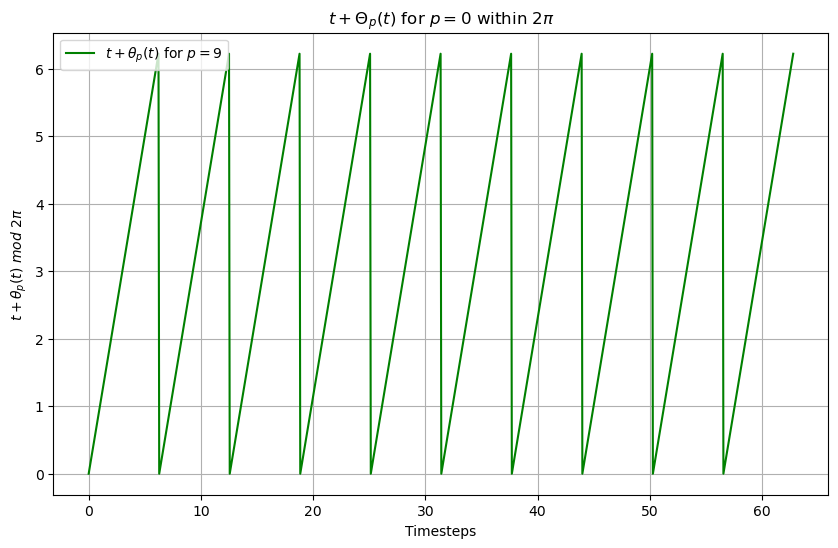

In [14]:
# 定数の設定
p = 0 # 位相シフト
timesteps = np.arange(0, 10, 0.01) # 0日から24日まで

# 4日ごとに位相をp*2pi/24だけ進める
theta_p = (np.floor(timesteps / 4) * p) * (2 * np.pi / 24)

# プロット

# t の範囲を設定 (0から24の範囲で、時間ステップは1日とする)
t = timesteps * 2 * np.pi   # 24日で2piに相当

# t + theta_p(t) を計算し、値域を 2pi でモジュロする
t_plus_theta_p = (t + theta_p) % (2 * np.pi)

# プロットの点を除去して再プロット
plt.figure(figsize=(10, 6))
plt.plot(t, t_plus_theta_p, label=r'$t + \theta_p(t)$ for $p=9$', color='green')
plt.title(r'$t + \Theta_p(t)$ for $p=0$ within $2\pi$')
plt.xlabel('Timesteps')
plt.ylabel(r'$t + \theta_p(t)\  mod\  2\pi$')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
# 定数の設定
p = 9 # 位相シフト
Omega = 1.05
timesteps = np.arange(0, 10, 0.01) # 0日から24日まで

# 4日ごとに位相をp*2pi/24だけ進める
theta_p = (np.floor(timesteps / 4) * p) * (2 * np.pi / 24)

# プロット

# t の範囲を設定 (0から24の範囲で、時間ステップは1日とする)
t = timesteps * 2 * np.pi   # 24日で2piに相当

# t + theta_p(t) を計算し、値域を 2pi でモジュロする
t_plus_theta_p = Omega*(t + theta_p) % (2 * np.pi)
# 不連続な点を検出
delta = np.diff(t_plus_theta_p)
discontinuities = np.where(np.abs(delta) > np.pi / 6)[0] + 1

# プロットの作成
plt.figure(figsize=(10, 8))

# 不連続な点を検出
delta = np.diff(t_plus_theta_p)
discontinuities = np.where(np.abs(delta) > np.pi / 6)[0] + 1

# プロットの作成
plt.figure(figsize=(10, 8))

# 不連続な点で分割してプロット
start_idx = 0
for dis in discontinuities:
    plt.plot(t[start_idx:dis], t_plus_theta_p[start_idx:dis], color='orange')
    start_idx = dis

# 残りの部分をプロット
plt.plot(t[start_idx:], t_plus_theta_p[start_idx:], color='orange')

# 不連続な点をマーク
for dis in discontinuities:
    # ジャンプする前の点を白丸でマーク
    plt.plot(t[dis - 1], t_plus_theta_p[dis - 1], 'o', markerfacecolor='white', markeredgecolor='orange', markersize=10)
    # ジャンプした後の点を塗りつぶしの丸でマーク
    if dis < len(t):
        plt.plot(t[dis], t_plus_theta_p[dis], 'o', markerfacecolor='orange', markeredgecolor='orange', markersize=10)

plt.xlabel('Time', fontsize=18)
plt.ylabel(r'$\Omega(t + \theta_p(t))\  mod\  2\pi$', fontsize=18)
plt.grid(True)
#plt.legend([r'$t + \theta_p(t)$ for $p=9$'], fontsize=18)

# PDFとして保存
plt.savefig(f'{dir_name_plot}/theta_{p}_modulation.pdf')

plt.close()  # プロットを閉じる

<Figure size 1000x800 with 0 Axes>